## Simple Demonstration of Smartypy Utilities
(in work)

### Neural Networks

In [2]:
%matplotlib inline
import numpy as np
import pylab as plt

import os
import sys
sys.path.append(os.path.split(os.getcwd())[0])
from smartypy import neuralNetwork

//anaconda/envs/smartypy/lib/python3.5/site-packages/numpy/core/numeric.py:190: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = empty(shape, dtype, order)
/Users/zachdischner/code/machineLearningCoursera/smartypy/logisticRegression.py:425: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  display_array[rowStart:rowStart+example_height, colStart:colStart+example_width] = X[curr_ex,:].reshape((example_height,example_width)).T/max_val


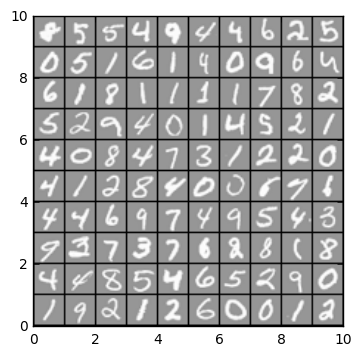

In [3]:
## Load Test Data
X,y,theta1,theta2 = neuralNetwork._load_test_data()
m,n = X.shape

num_classifications = len(np.unique(y))
# y_classifications = zeros((m,num_classifications))
# for idx in range(m):
#     y_classifications[idx,y[idx]] = 1

## Test data X is a set of images (reshaped from 20x20 ==> 400x1) with handwritten digits 
# Display some images
rand_indices = np.random.permutation(m)
sel = X[rand_indices[0:100],:]
plt.figure()
neuralNetwork.displayData(sel) ## Produces some warnings, its okay. Took this funciton from course materials

In [10]:
## Form a simple 2-layer SupervisedNeuralNetwork Object
snn = neuralNetwork.SupervisedNeuralNetwork(X,y, 
                                            num_classifications=num_classifications, 
                                            regularization=1.0)
# Note, object determines input and output layer size automagically
print(snn)
snn.train(max_iter=10)
print("Trained Neural Network with final cost calculated as J = {}".format(snn.J))

Neural Network with 2 Layers, mapping 400 inputs to 10 outputs. Current approx cost 7.047722699818084
Training neural network described layer nodes=None. Regularization=1.0
Performing minimization (this could take a while). Initial cost: 7.009970173360076
Iter: 0, cost: 3.69325
Iter: 1, cost: 3.16475
Iter: 2, cost: 1.66647
Iter: 3, cost: 1.43533
Iter: 4, cost: 1.34132
Iter: 5, cost: 1.24962
Iter: 6, cost: 1.07915
Iter: 7, cost: 1.01374
Iter: 8, cost: 0.95316
Iter: 9, cost: 0.89296
         Current function value: 0.892962
         Iterations: 10
         Function evaluations: 18
         Gradient evaluations: 18
Minimization completed with final cost 0.8929615624018881
Trained Neural Network with final cost calculated as J = 8.48572714071311


2-layer Neural Network predicted that the image represents digit 6 with 87.62165076390936% confidence. Truth ==> 6
2-layer Neural Network predicted that the image represents digit 7 with 44.777269268895786% confidence. Truth ==> 9
2-layer Neural Network predicted that the image represents digit 4 with 85.01639180693864% confidence. Truth ==> 4
2-layer Neural Network predicted that the image represents digit 6 with 99.57101233652116% confidence. Truth ==> 6


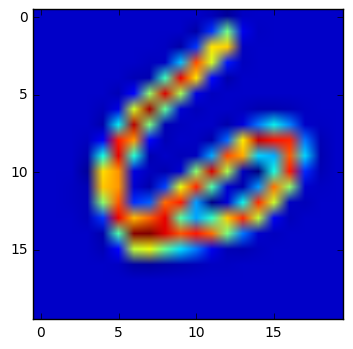

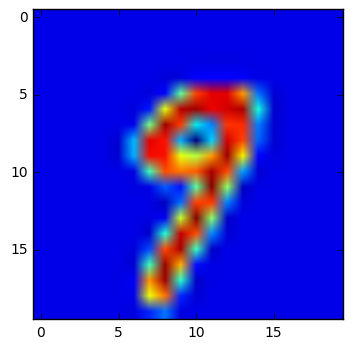

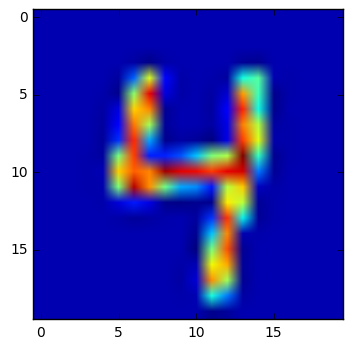

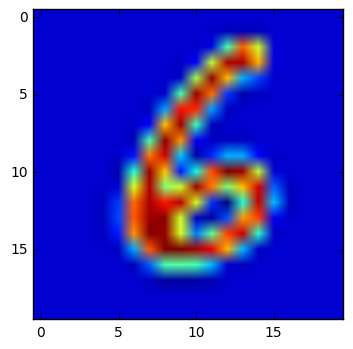

In [11]:
## See how it did
for ii in range(4):
    imagenum = np.random.randint(5000)
    plt.figure()
    plt.imshow(np.reshape(X[imagenum],(20,20)).T)
    nn_guess,confidence = snn.predict(X[imagenum])[0]
    print("2-layer Neural Network predicted that the image represents digit {} with {}% confidence. Truth ==> {}".format(nn_guess,100*confidence,y[imagenum]))

### How about more layers???

Neural Network with 3 Layers, mapping 400 inputs to 10 outputs. Current approx cost 6.843802302772382
Training neural network described layer nodes=None. Regularization=1.0
Performing minimization (this could take a while). Initial cost: 6.8391093317863705
Iter: 0, cost: 3.29079
Iter: 1, cost: 3.24242
Iter: 2, cost: 2.97112
Iter: 3, cost: 2.44522
Iter: 4, cost: 2.01189
Iter: 5, cost: 1.86768
Iter: 6, cost: 1.73525
Iter: 7, cost: 1.56690
Iter: 8, cost: 1.40480
Iter: 9, cost: 1.30496
Iter: 10, cost: 1.19871
Iter: 11, cost: 1.10324
Iter: 12, cost: 1.04176
Iter: 13, cost: 0.98559
Iter: 14, cost: 0.94589
Iter: 15, cost: 0.90247
Iter: 16, cost: 0.88355
Iter: 17, cost: 0.83813
Iter: 18, cost: 0.79334
Iter: 19, cost: 0.76510
Iter: 20, cost: 0.73095
Iter: 21, cost: 0.71532
Iter: 22, cost: 0.69862
Iter: 23, cost: 0.67626
Iter: 24, cost: 0.66512
         Current function value: 0.665124
         Iterations: 25
         Function evaluations: 54
         Gradient evaluations: 54
Minimization comple

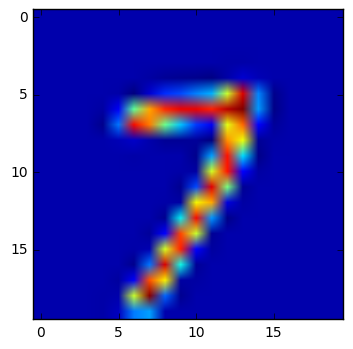

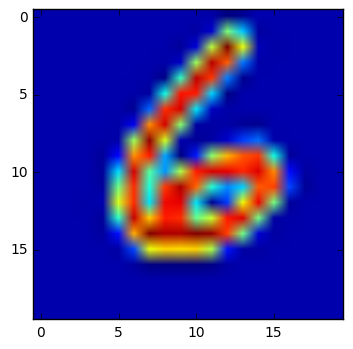

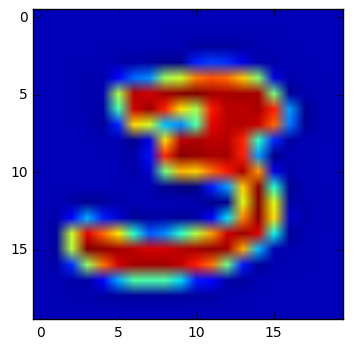

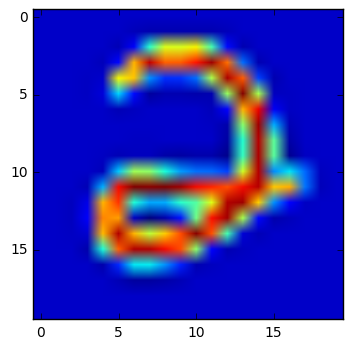

In [12]:
## That kinda sucked at predicting. Let's try again with an additional layer in the network
snn.add_layer(25) # Easy to add another layer

# could have also passed >> hidden_layer_sizes=[25] on instantiation
print(snn)
## Retrain
snn.train(max_iter=25) ## More layers, might take more forward/back propegations
print("Trained Neural Network with final cost calculated as J = {}".format(snn.J))

## See how it did
for ii in range(4):
    imagenum = np.random.randint(5000)
    plt.figure()
    plt.imshow(np.reshape(X[imagenum],(20,20)).T)
    nn_guess,confidence = snn.predict(X[imagenum])[0]
    print("3-layer Neural Network predicted that the image represents digit {} with {}% confidence. Truth ==> {}".format(nn_guess,100*confidence,y[imagenum]))

2

Neural Network with 2 Layers, mapping 400 inputs to 10 outputs